# Biblioteki oraz dane

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import *
from scipy import stats

In [2]:
data = pd.read_csv("solubility_database.csv")

In [3]:
data

,Name,InChI,InChIKey,SMILES,MolWt,MolLogP,MolMR,HeavyAtomCount,NumHAcceptors,NumHDonors,...,NumValenceElectrons,NumAromaticRings,NumSaturatedRings,NumAliphaticRings,RingCount,TPSA,LabuteASA,BalabanJ,BertzCT,solubility_mg_L
0,"N,N,N-trimethyloctadecan-1-aminium bromide",InChI=1S/C21H46N.BrH/c1-5-6-7-8-9-10-11-12-13-...,SZEMGTQCPRNXEG-UHFFFAOYSA-M,[Br-].CCCCCCCCCCCCCCCCCC[N+](C)(C)C,392.510,3.9581,102.4454,23.0,0.0,0.0,...,142.0,0.0,0.0,0.0,0.0,0.00,158.520601,0.000000e+00,210.377334,95.00
1,NoData,NoData,NoData,What?,NaN,NaN,51.9012,13.0,1.0,NaN,...,62.0,2.0,0.0,1.0,3.0,29.10,75.183563,2.582996e+00,511.229248,94.10
2,NoData,NoData,NoData,What?,140.569,2.1525,36.8395,9.0,1.0,0.0,...,46.0,1.0,0.0,0.0,1.0,17.07,58.261134,3.009782e+00,202.661065,935.00
3,NoData,NoData,NoData,What?,756.226,8.1161,NaN,53.0,6.0,NaN,...,264.0,6.0,0.0,0.0,6.0,120.72,NaN,2.322963e-07,1964.648666,90.00
4,NoData,NoData,NoData,What?,NaN,2.4854,119.0760,31.0,6.0,NaN,...,164.0,2.0,4.0,4.0,6.0,56.60,183.183268,1.084427e+00,769.899934,9.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10178,benzyl 2-hydroxybenzoate,InChI=1S/C14H12O3/c15-13-9-5-4-8-12(13)14(16)1...,ZCTQGTTXIYCGGC-UHFFFAOYSA-N,Oc1ccccc1C(=O)OCc2ccccc2,228.247,2.7492,63.6683,17.0,3.0,1.0,...,86.0,2.0,0.0,0.0,2.0,46.53,99.287683,2.012837e+00,505.885589,8.80
10179,tetrabutylstannane,"InChI=1S/4C4H9.Sn/c4*1-3-4-2;/h4*1,3-4H2,2H3;",AFCAKJKUYFLYFK-UHFFFAOYSA-N,CCCC[Sn](CCCC)(CCCC)CCCC,347.175,6.6356,84.6140,17.0,0.0,0.0,...,104.0,0.0,0.0,0.0,0.0,0.00,114.830735,4.391491e+00,116.094393,8.80
10180,magnesium(2+) ion dimethanolate,InChI=1S/2CH3O.Mg/c2*1-2;/h2*1H3;/q2*-1;+2,CRGZYKWWYNQGEC-UHFFFAOYSA-N,[Mg++].C[O-].C[O-],86.373,-2.4278,17.6020,5.0,2.0,0.0,...,28.0,0.0,0.0,0.0,0.0,46.12,47.968388,-1.333333e-08,7.609640,8.75
10181,cadmium,InChI=1S/Cd/q+2,WLZRMCYVCSSEQC-UHFFFAOYSA-N,[Cd++],112.412,-0.0025,0.0000,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00,27.651029,0.000000e+00,0.000000,8.70


# Preprocesing

In [4]:
# usuniecie wartosci NA
data_pp1 = data.dropna(axis=0, how='any')

# konwertowanie typow
data_pp2 = data_pp1.convert_dtypes()

# usuniecie wierszy z wartosciami 'What'
data_pp3 = data_pp2[data_pp2.SMILES != 'What?']

# usuniecie zduplikowanych wierszy
data_pp4 = data_pp3.drop_duplicates(subset=['SMILES', 'MolWt'], keep='first') 

# selekcja tylko kolumn o wartosciach liczbowych
data_pp5 = data_pp4.select_dtypes(include=['int', 'float'])

In [5]:
data_pp5

,MolWt,MolLogP,MolMR,HeavyAtomCount,NumHAcceptors,NumHDonors,NumHeteroatoms,NumRotatableBonds,NumValenceElectrons,NumAromaticRings,NumSaturatedRings,NumAliphaticRings,RingCount,TPSA,LabuteASA,BalabanJ,BertzCT,solubility_mg_L
0,392.51,3.9581,102.4454,23,0,0,2,17,142,0,0,0,0,0.0,158.520601,0.0,210.377334,95.0
101,182.223,0.3285,50.7804,13,2,2,4,4,72,0,0,0,0,58.2,77.70235,3.689373,230.340316,11786.000001
102,108.184,2.6728,36.748,8,0,0,0,0,44,0,0,1,1,0.0,50.908809,2.285714,72.605938,117.0
103,205.286,0.5904,49.1935,13,5,0,6,7,76,0,0,0,0,57.12,79.077357,3.873429,169.066693,113.6
104,240.803,2.6637,60.776,14,3,0,5,9,86,0,0,0,0,27.69,93.053663,4.21067,118.205924,113.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9977,264.369,2.617,78.6762,19,4,1,4,8,106,1,0,0,1,41.57,115.300645,2.394548,374.236893,258.351227
9978,444.44,-0.2144,109.5409,32,9,6,10,2,170,1,0,3,4,181.62,182.429237,2.047922,1148.584975,522.171469
9979,150.221,2.82402,46.9328,11,1,1,1,1,60,1,0,0,1,20.23,67.685405,3.09272,251.049732,969.908239
9980,454.611,5.09308,131.656,33,6,0,6,13,180,2,0,0,2,63.95,198.569223,2.023333,938.203977,47.603616


In [6]:
data_pp5.describe()

,MolWt,MolLogP,MolMR,HeavyAtomCount,NumHAcceptors,NumHDonors,NumHeteroatoms,NumRotatableBonds,NumValenceElectrons,NumAromaticRings,NumSaturatedRings,NumAliphaticRings,RingCount,TPSA,LabuteASA,BalabanJ,BertzCT,solubility_mg_L
count,9882.000000,9882.000000,9882.000000,9882.000000,9882.000000,9882.000000,9882.000000,9882.000000,9882.000000,9882.000000,9882.000000,9882.000000,9882.000000,9882.000000,9882.000000,9882.000000,9882.000000,9.882000e+03
mean,266.243373,1.974689,66.675816,17.344869,3.483505,1.111921,5.195811,4.058591,94.086420,1.066889,0.291945,0.446974,1.513864,62.468572,108.689351,2.397216,466.510587,1.012443e+05
std,183.747971,3.512556,46.421894,12.212191,3.488089,1.490591,4.716388,5.629155,64.613372,1.305899,0.879821,1.055140,1.642733,63.193593,76.195531,1.086533,545.031647,5.865515e+05
min,9.012000,-40.873200,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.504228,-0.000004,0.000000,4.400463e-08
25%,162.276000,0.607375,40.551525,11.000000,2.000000,0.000000,3.000000,1.000000,58.000000,0.000000,0.000000,0.000000,0.000000,26.300000,66.619649,2.009010,162.890116,1.257675e+01
50%,229.211000,1.941350,58.633400,15.000000,3.000000,1.000000,4.000000,3.000000,82.000000,1.000000,0.000000,0.000000,1.000000,50.940000,93.333732,2.539539,352.041701,5.530200e+02
75%,320.347000,3.415600,81.938000,21.000000,4.000000,2.000000,6.000000,5.000000,112.000000,2.000000,0.000000,1.000000,2.000000,80.390000,129.118374,3.032456,606.562848,1.249925e+04
max,5299.456000,68.541140,1419.351700,388.000000,86.000000,26.000000,89.000000,141.000000,2012.000000,35.000000,30.000000,30.000000,36.000000,1214.340000,2230.685124,7.517310,20720.267708,3.770000e+07


# Przeskalowanie właściwości modelowanej

<AxesSubplot: >

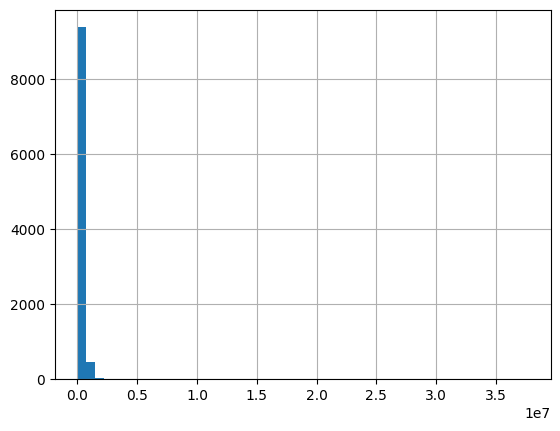

In [7]:
data_pp5.solubility_mg_L.hist(bins=50)

In [8]:
data_pp6 = data_pp5.copy()
data_pp6['LogS'] = np.log10(data_pp6['solubility_mg_L']/1000/data_pp6['MolWt'])
data_pp6.drop('solubility_mg_L', axis=1, inplace=True)

<AxesSubplot: >

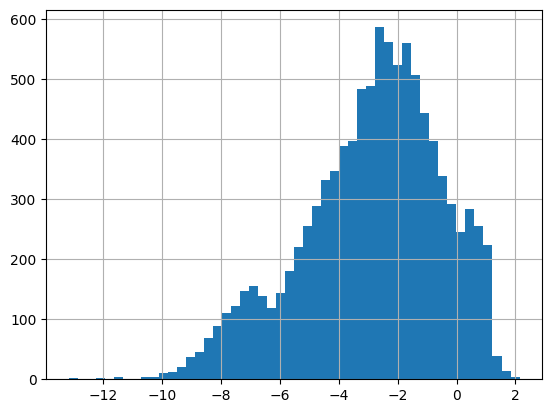

In [9]:
data_pp6.LogS.hist(bins=50)

# Detekcja wartości odstających

<AxesSubplot: >

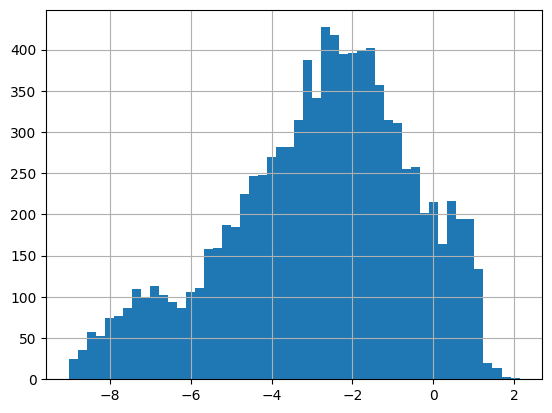

In [10]:
Q1 = data_pp6.quantile(0.25)
Q3 = data_pp6.quantile(0.75)
IQR = Q3 - Q1

data_pp7 = data_pp6[~((data_pp6.LogS < (Q1.LogS-1.5*IQR.LogS)) |(data_pp6.LogS > (Q3.LogS+1.5*IQR.LogS)))]
data_pp7.LogS.hist(bins=50)

# Przygotowanie danych do modelowania 

In [11]:
# wydzielenie zmiennej modelowanej
X = data_pp7.drop(['LogS'], axis=1)
Y = data_pp7["LogS"]

# podział zbioru na część uczacą oraz testową
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, Y, test_size=0.2, random_state=1, shuffle=True)
y_train = y_train.astype('float').values
y_test = y_test.astype('float').values

# Miary dopasowania (błędu) modelu

In [12]:
def addMetrics(df, model_name, y_learn, y_train, y_pred, y_test):
    r2_train = metrics.r2_score(y_train, y_learn)
    rmse_train = metrics.mean_squared_error(y_train, y_learn, squared=False)
    nrmse_train = "%.2f %%" % (100*rmse_train/(y_train.max()-y_train.min()))
    
    r2_test = metrics.r2_score(y_test, y_pred)
    rmse_test = metrics.mean_squared_error(y_test, y_pred, squared=False)
    nrmse_test = "%.2f %%" % (100*rmse_test/(y_test.max()-y_test.min()))
    
    newRow = pd.DataFrame({"R2_train" : r2_train,  "R2_test" : r2_test,
                           "RMSE_train" : rmse_train, "RMSE_test" : rmse_test,
                           "NRMSE_train" : nrmse_train, "NRMSE_test" : nrmse_test}, index = [model_name])
    return pd.concat([df, newRow])

# Regresja liniowa

In [13]:
reg_lin = linear_model.LinearRegression()
reg_lin.fit(X_train, y_train)

y_learn = reg_lin.predict(X_train)
y_pred = reg_lin.predict(X_test)

summary1 = addMetrics(pd.DataFrame(), 'Linear Regression', y_learn, y_train, y_pred, y_test)
summary1

,R2_train,R2_test,RMSE_train,RMSE_test,NRMSE_train,NRMSE_test
Linear Regression,0.5148,0.430067,1.601406,1.738029,14.35 %,16.52 %


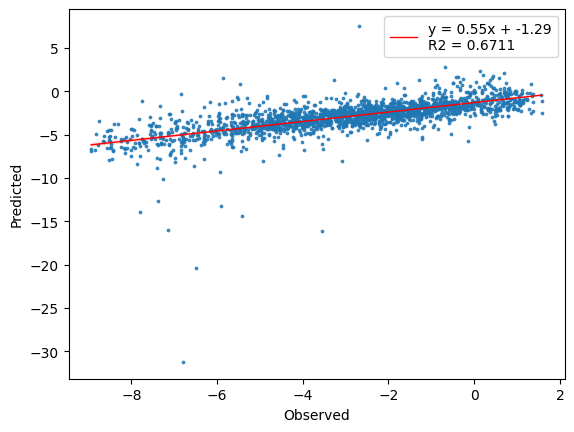

In [14]:
slope, intercept, r_value, p_value, std_err = stats.linregress(y_test, y_pred)
ax = sns.regplot(x = y_test, y = y_pred, scatter_kws={'s' : 3},
                  line_kws={'label':"y = {0:.2f}x + {1:.2f}\nR2 = {2:.4f}".format(slope,intercept,r_value), 'color' : 'red', 'lw' : 1})
ax.legend()
ax.set_xlabel("Observed")
ax.set_ylabel("Predicted")
plt.show()

# Regresja Lasso (regularyzacja L1)

In [15]:
parameters = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1]}

cv = model_selection.KFold(n_splits=10, shuffle=True)

reg_lasso = linear_model.Lasso(max_iter=10000)

lasso_GS = model_selection.GridSearchCV(reg_lasso, parameters, cv=cv, scoring='neg_root_mean_squared_error')

lasso_GS.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=True),
             estimator=Lasso(max_iter=10000),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1]},
             scoring='neg_root_mean_squared_error')

In [16]:
lasso_GS.best_estimator_

Lasso(alpha=0.0001, max_iter=10000)

In [17]:
reg_lasso = linear_model.Lasso(alpha=lasso_GS.best_estimator_.alpha, max_iter=10000)
reg_lasso.fit(X_train, y_train)

y_learn = reg_lasso.predict(X_train)
y_pred = reg_lasso.predict(X_test)

summary2 = addMetrics(summary1, 'Lasso Regression', y_learn, y_train, y_pred, y_test)
summary2

,R2_train,R2_test,RMSE_train,RMSE_test,NRMSE_train,NRMSE_test
Linear Regression,0.514800,0.430067,1.601406,1.738029,14.35 %,16.52 %
Lasso Regression,0.514799,0.430098,1.601406,1.737982,14.35 %,16.52 %


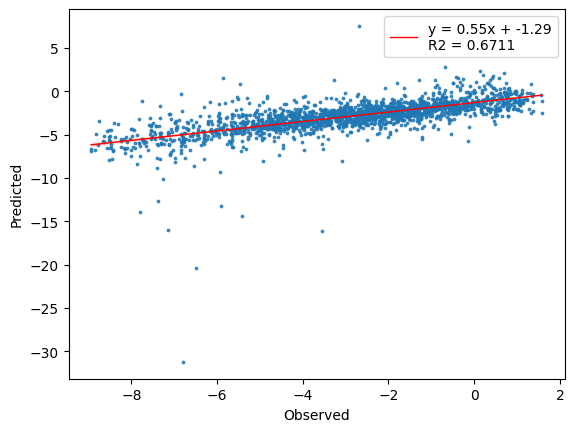

In [18]:
slope, intercept, r_value, p_value, std_err = stats.linregress(y_test, y_pred)
ax = sns.regplot(x = y_test, y = y_pred, scatter_kws={'s' : 3},
                  line_kws={'label':"y = {0:.2f}x + {1:.2f}\nR2 = {2:.4f}".format(slope,intercept,r_value), 'color' : 'red', 'lw' : 1})
ax.legend()
ax.set_xlabel("Observed")
ax.set_ylabel("Predicted")
plt.show()

# Regresja Ridge (regularyzacja L2)

In [19]:
parameters = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1]}

cv = model_selection.KFold(n_splits=10, shuffle=True)

reg_ridge = linear_model.Ridge(max_iter=10000)

ridge_GS = model_selection.GridSearchCV(reg_lasso, parameters, cv=cv, scoring='neg_root_mean_squared_error')

ridge_GS.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=True),
             estimator=Lasso(alpha=0.0001, max_iter=10000),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1]},
             scoring='neg_root_mean_squared_error')

In [20]:
ridge_GS.best_estimator_

Lasso(alpha=0.0001, max_iter=10000)

In [21]:
reg_ridge = linear_model.Ridge(alpha=ridge_GS.best_estimator_.alpha, max_iter=10000)
reg_ridge.fit(X_train, y_train)

y_learn = reg_ridge.predict(X_train)
y_pred = reg_ridge.predict(X_test)

summary3 = addMetrics(summary2, 'Ridge Regression', y_learn, y_train, y_pred, y_test)
summary3

,R2_train,R2_test,RMSE_train,RMSE_test,NRMSE_train,NRMSE_test
Linear Regression,0.514800,0.430067,1.601406,1.738029,14.35 %,16.52 %
Lasso Regression,0.514799,0.430098,1.601406,1.737982,14.35 %,16.52 %
Ridge Regression,0.514800,0.430067,1.601406,1.738029,14.35 %,16.52 %


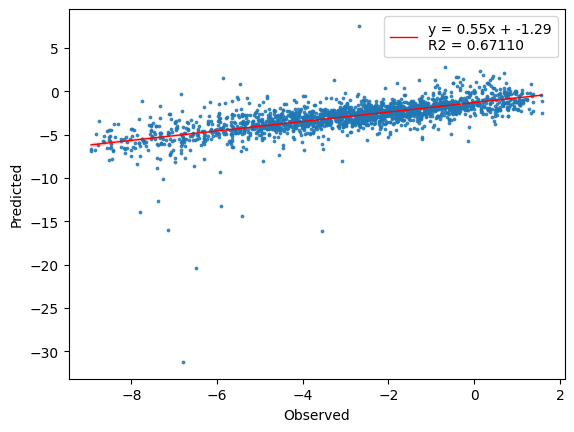

In [22]:
slope, intercept, r_value, p_value, std_err = stats.linregress(y_test, y_pred)
ax = sns.regplot(x = y_test, y = y_pred, scatter_kws={'s' : 3},
                  line_kws={'label':"y = {0:.2f}x + {1:.2f}\nR2 = {2:.5f}".format(slope,intercept,r_value), 'color' : 'red', 'lw' : 1})
ax.legend()
ax.set_xlabel("Observed")
ax.set_ylabel("Predicted")
plt.show()

# Sieci elastyczne (regularyzacja L1 i L2)

In [23]:
parameters = {'alpha': [0.001, 0.01, 0.1, 1], 'l1_ratio': [0.001, 0.01, 0.1, 1]}

cv = model_selection.KFold(n_splits=10, shuffle=True)

reg_elastic = linear_model.ElasticNet(max_iter=15000)

elastic_GS = model_selection.GridSearchCV(reg_elastic, parameters, cv=cv, scoring='neg_root_mean_squared_error')

elastic_GS.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=True),
             estimator=ElasticNet(max_iter=15000),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1],
                         'l1_ratio': [0.001, 0.01, 0.1, 1]},
             scoring='neg_root_mean_squared_error')

In [24]:
elastic_GS.best_estimator_

ElasticNet(alpha=0.001, l1_ratio=0.001, max_iter=15000)

In [25]:
reg_elastic = linear_model.ElasticNet(alpha=elastic_GS.best_estimator_.alpha, l1_ratio=elastic_GS.best_estimator_.l1_ratio, max_iter=15000)
reg_elastic.fit(X_train, y_train)

y_learn = reg_elastic.predict(X_train)
y_pred = reg_elastic.predict(X_test)

summary4 = addMetrics(summary3, 'Elastic Net', y_learn, y_train, y_pred, y_test)
summary4

,R2_train,R2_test,RMSE_train,RMSE_test,NRMSE_train,NRMSE_test
Linear Regression,0.514800,0.430067,1.601406,1.738029,14.35 %,16.52 %
Lasso Regression,0.514799,0.430098,1.601406,1.737982,14.35 %,16.52 %
Ridge Regression,0.514800,0.430067,1.601406,1.738029,14.35 %,16.52 %
Elastic Net,0.514799,0.430135,1.601406,1.737925,14.35 %,16.52 %


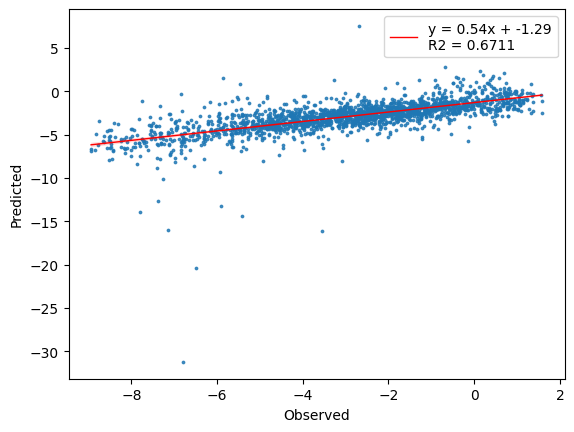

In [26]:
slope, intercept, r_value, p_value, std_err = stats.linregress(y_test, y_pred)
ax = sns.regplot(x = y_test, y = y_pred, scatter_kws={'s' : 3},
                  line_kws={'label':"y = {0:.2f}x + {1:.2f}\nR2 = {2:.4f}".format(slope,intercept,r_value), 'color' : 'red', 'lw' : 1})
ax.legend()
ax.set_xlabel("Observed")
ax.set_ylabel("Predicted")
plt.show()

In [27]:
pd.DataFrame({"linear_coef" : reg_lin.coef_,
              "lasso_coef" : reg_lasso.coef_,
              "ridge_coef" : reg_ridge.coef_,
              "elastic_coef" : reg_elastic.coef_}, index=X.columns)

,linear_coef,lasso_coef,ridge_coef,elastic_coef
MolWt,-0.005793,-0.005795,-0.005793,-0.005793
MolLogP,-0.447918,-0.447914,-0.447918,-0.447751
MolMR,0.011146,0.011141,0.011146,0.011096
HeavyAtomCount,-0.456220,-0.456029,-0.456220,-0.455190
NumHAcceptors,0.115328,0.115219,0.115328,0.115243
NumHDonors,0.178431,0.178326,0.178431,0.178295
NumHeteroatoms,-0.098552,-0.098444,-0.098552,-0.098356
NumRotatableBonds,0.018933,0.018958,0.018933,0.019051
NumValenceElectrons,0.079479,0.079457,0.079479,0.079356
NumAromaticRings,-0.276040,-0.417525,-0.276040,-0.275709


# Drzewa decyzyjne

In [28]:
parameters={"max_depth" : [None,2,4,6,8],
           "min_samples_leaf":[2,4,6,8],
           "min_weight_fraction_leaf":[0.0,0.1,0.2,0.3,0.4,0.5],
           "max_features":[None,"log2","sqrt"],
           "max_leaf_nodes":[None,20,40,60,80] }

reg_tree = tree.DecisionTreeRegressor()

tree_GS1 = model_selection.GridSearchCV(reg_tree, parameters, scoring='neg_root_mean_squared_error')

tree_GS1.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [None, 2, 4, 6, 8],
                         'max_features': [None, 'log2', 'sqrt'],
                         'max_leaf_nodes': [None, 20, 40, 60, 80],
                         'min_samples_leaf': [2, 4, 6, 8],
                         'min_weight_fraction_leaf': [0.0, 0.1, 0.2, 0.3, 0.4,
                                                      0.5]},
             scoring='neg_root_mean_squared_error')

In [29]:
tree_GS1.best_estimator_

DecisionTreeRegressor(max_depth=6, max_leaf_nodes=60, min_samples_leaf=6)

In [30]:
parameters={"max_depth" : [5,6,7],
           "min_samples_leaf":[5,6,7],
           "max_leaf_nodes":[None,50,60,70] }

cv = model_selection.KFold(n_splits=10, shuffle=True)

reg_tree = tree.DecisionTreeRegressor()

tree_GS2 = model_selection.GridSearchCV(reg_tree, parameters, cv=cv, scoring='neg_root_mean_squared_error')

tree_GS2.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=True),
             estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [5, 6, 7],
                         'max_leaf_nodes': [None, 50, 60, 70],
                         'min_samples_leaf': [5, 6, 7]},
             scoring='neg_root_mean_squared_error')

In [31]:
tree_GS2.best_estimator_

DecisionTreeRegressor(max_depth=7, min_samples_leaf=7)

In [32]:
reg_tree = tree.DecisionTreeRegressor(max_depth=tree_GS2.best_estimator_.max_depth,
                                      min_samples_leaf=tree_GS2.best_estimator_.min_samples_leaf, 
                                      max_leaf_nodes=tree_GS2.best_estimator_.max_leaf_nodes)
reg_tree.fit(X_train, y_train)

y_learn = reg_tree.predict(X_train)
y_pred = reg_tree.predict(X_test)

summary5 = addMetrics(summary4, 'Decision Tree', y_learn, y_train, y_pred, y_test)
summary5

,R2_train,R2_test,RMSE_train,RMSE_test,NRMSE_train,NRMSE_test
Linear Regression,0.514800,0.430067,1.601406,1.738029,14.35 %,16.52 %
Lasso Regression,0.514799,0.430098,1.601406,1.737982,14.35 %,16.52 %
Ridge Regression,0.514800,0.430067,1.601406,1.738029,14.35 %,16.52 %
Elastic Net,0.514799,0.430135,1.601406,1.737925,14.35 %,16.52 %
Decision Tree,0.751484,0.697605,1.146088,1.265997,10.27 %,12.03 %


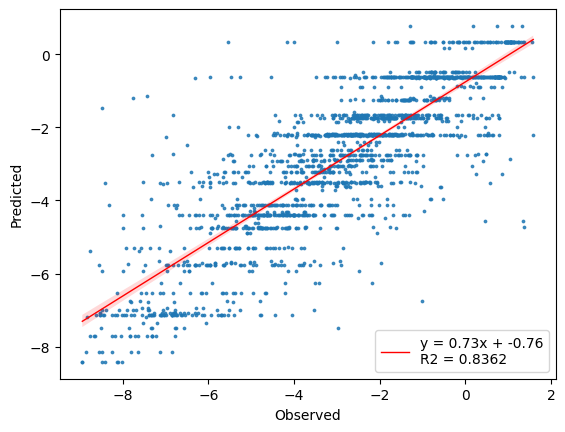

In [33]:
slope, intercept, r_value, p_value, std_err = stats.linregress(y_test, y_pred.T)
ax = sns.regplot(x = y_test, y = y_pred, scatter_kws={'s' : 3},
                  line_kws={'label':"y = {0:.2f}x + {1:.2f}\nR2 = {2:.4f}".format(slope,intercept,r_value), 'color' : 'red', 'lw' : 1})
ax.legend()
ax.set_xlabel("Observed")
ax.set_ylabel("Predicted")
plt.show()

# Sztuczne sieci neuronowe (ANN)

In [34]:
# skalowanie danych 
scalerX = preprocessing.MinMaxScaler(feature_range=(0,1))
scalerX.fit(X_train)
X_train_scaled = scalerX.transform(X_train)
X_test_scaled = scalerX.transform(X_test)

scalerY = preprocessing.MinMaxScaler(feature_range=(0,1))
scalerY.fit(y_train.reshape(-1,1))
y_train_scaled = scalerY.transform(y_train.reshape(-1,1))
y_test_scaled = scalerY.transform(y_test.reshape(-1,1))

In [35]:
mlp = neural_network.MLPRegressor(hidden_layer_sizes=(100, 50, 30), activation='relu', solver='lbfgs', max_iter=5000)
mlp.fit(X_train_scaled, y_train_scaled.ravel())

y_learn = scalerY.inverse_transform(mlp.predict(X_train_scaled).reshape(-1,1))
y_pred = scalerY.inverse_transform(mlp.predict(X_test_scaled).reshape(-1,1))

summary6 = addMetrics(summary5, 'MLP network', y_learn, y_train, y_pred, y_test)
summary6

,R2_train,R2_test,RMSE_train,RMSE_test,NRMSE_train,NRMSE_test
Linear Regression,0.514800,0.430067,1.601406,1.738029,14.35 %,16.52 %
Lasso Regression,0.514799,0.430098,1.601406,1.737982,14.35 %,16.52 %
Ridge Regression,0.514800,0.430067,1.601406,1.738029,14.35 %,16.52 %
Elastic Net,0.514799,0.430135,1.601406,1.737925,14.35 %,16.52 %
Decision Tree,0.751484,0.697605,1.146088,1.265997,10.27 %,12.03 %
MLP network,0.808684,0.756560,1.005579,1.135902,9.01 %,10.80 %


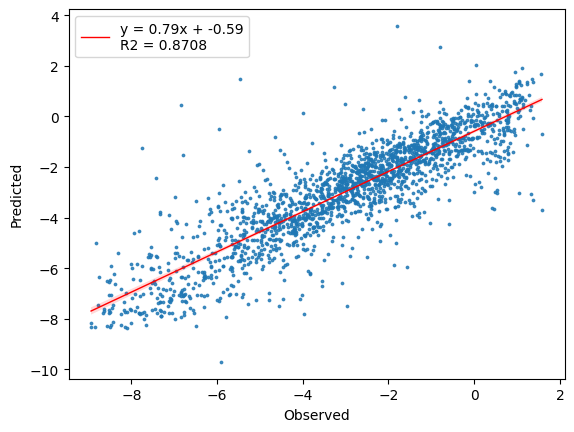

In [36]:
slope, intercept, r_value, p_value, std_err = stats.linregress(y_test, y_pred.T)
ax = sns.regplot(x = y_test, y = y_pred, scatter_kws={'s' : 3},
                  line_kws={'label':"y = {0:.2f}x + {1:.2f}\nR2 = {2:.4f}".format(slope,intercept,r_value), 'color' : 'red', 'lw' : 1})
ax.legend()
ax.set_xlabel("Observed")
ax.set_ylabel("Predicted")
plt.show()

# Sieci głębokie (DNN)

In [37]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [38]:
dnn = Sequential()
dnn.add(Dense(100, activation="relu"))
dnn.add(Dropout(0.5))
dnn.add(Dense(50, activation="relu"))
dnn.add(Dropout(0.5))
dnn.add(Dense(30, activation="relu"))
dnn.add(Dropout(0.5))
dnn.add(Dense(1, activation="linear"))

dnn.compile(loss='mse', optimizer='adam', metrics=[tf.keras.metrics.MeanSquaredError()])

In [39]:
dnn.fit(X_train_scaled, y_train_scaled, epochs=1000, batch_size=500, verbose=0)

In [40]:
y_learn = scalerY.inverse_transform(dnn.predict(X_train_scaled).reshape(-1,1))
y_pred = scalerY.inverse_transform(dnn.predict(X_test_scaled).reshape(-1,1))

summary7 = addMetrics(summary6, 'Deep network', y_learn, y_train, y_pred, y_test)
summary7

62/62 [==============================] - 0s 2ms/step


,R2_train,R2_test,RMSE_train,RMSE_test,NRMSE_train,NRMSE_test
Linear Regression,0.514800,0.430067,1.601406,1.738029,14.35 %,16.52 %
Lasso Regression,0.514799,0.430098,1.601406,1.737982,14.35 %,16.52 %
Ridge Regression,0.514800,0.430067,1.601406,1.738029,14.35 %,16.52 %
Elastic Net,0.514799,0.430135,1.601406,1.737925,14.35 %,16.52 %
Decision Tree,0.751484,0.697605,1.146088,1.265997,10.27 %,12.03 %
MLP network,0.808684,0.756560,1.005579,1.135902,9.01 %,10.80 %
Deep network,0.766847,0.747807,1.110098,1.156143,9.94 %,10.99 %


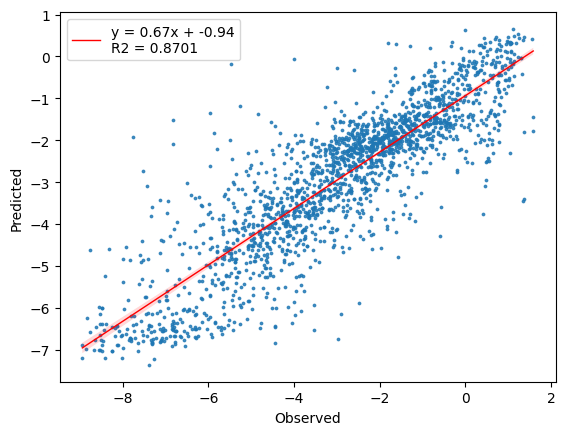

In [41]:
slope, intercept, r_value, p_value, std_err = stats.linregress(y_test, y_pred.T)
ax = sns.regplot(x = y_test, y = y_pred, scatter_kws={'s' : 3},
                  line_kws={'label':"y = {0:.2f}x + {1:.2f}\nR2 = {2:.4f}".format(slope,intercept,r_value), 'color' : 'red', 'lw' : 1})
ax.legend()
ax.set_xlabel("Observed")
ax.set_ylabel("Predicted")
plt.show()

# Porównanie wyników

Najgorsze wyniki uzyskaliśmy dla modeli regresji liniowej, które potrafiły wytłumaczyć mniej niż 50% zmienności zbioru danych. Uwzględnienie regulacji L1 i L2 powodowało jedynie pogorszenie wyników. Walidacja k-krotna wskazywała na wybór najmniejszych wartości parametrów branych pod uwagę.

Lepsze wyniki (objaśnienie niemal 70% zmienności) uzyskaliśmy za pomocą drzew decyzyjnych. Model ten jest najlepiej zoptymalizowany, ponieważ tuningu parametrów dokonaliśmy dwukrotnie - najpierw zgrubnie, a następnie dokładnie z zastosowaniem 10-krotnej kroswalidacji.

Zdecydowanie najlepsze modele osiągnęliśmy przy użyciu sieci neuronowej i głębokiej (objaśnienie około 75% zmienności) i to te modele powinny zostać wzięte pod uwagę w ostatecznym wyborze. Oba modele mają zbliżone wartości RMSE_test, jednakże wybieramy model sieci głębokiej, który charakteryzuje się mniejszą różnicą między RMSE_train i RMSE_test (mniejszym przetrenowaniem).

# Zapis najlepszego modelu

In [45]:
dnn.save("best_solubility_model", save_format="h5")